In [7]:
# Import Libraries & Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load and combine all enrolment CSV files
paths = [
    "../DATA/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv",
    "../DATA/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv",
    "../DATA/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv"
]

df = pd.concat([pd.read_csv(p) for p in paths], ignore_index=True)

In [9]:
# Data Cleaning & Preprocessing
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")

# Standardize state names
df['state'] = df['state'].str.strip().str.title()

# Handle missing values
df.fillna(0, inplace=True)

# Ensure numeric columns
age_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
df[age_cols] = df[age_cols].astype(int)

# Create total enrolments column
df['total_enrolments'] = df[age_cols].sum(axis=1)

In [10]:
# Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# State-level aggregation
state_enrolment = df.groupby('state')['total_enrolments'].sum().reset_index()

# Time-series aggregation
monthly_trend = df.groupby(['year', 'month'])['total_enrolments'].sum().reset_index()


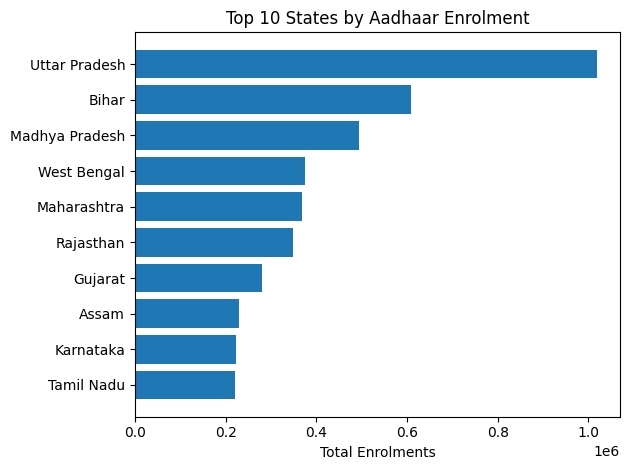

In [11]:
#Regional Pattern Analysis (State-wise)
state_enrolment = state_enrolment.sort_values('total_enrolments', ascending=False)

plt.figure()
plt.barh(state_enrolment['state'][:10], state_enrolment['total_enrolments'][:10])
plt.xlabel("Total Enrolments")
plt.title("Top 10 States by Aadhaar Enrolment")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/enrolment_top_states.png", dpi=150, bbox_inches="tight")
plt.show()

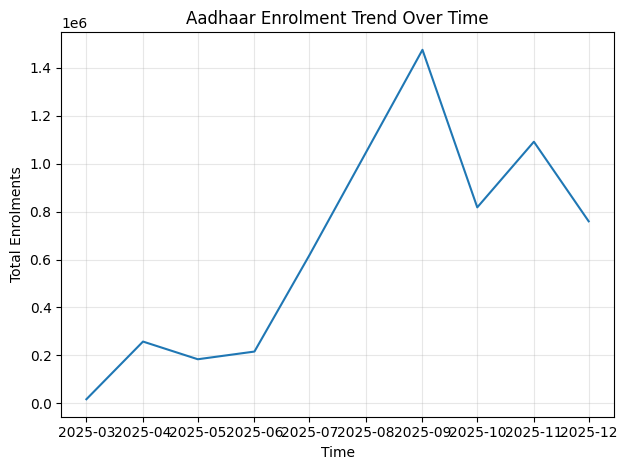

In [12]:
#Trend Analysis (Time-based)
monthly_trend['date'] = pd.to_datetime(
    monthly_trend['year'].astype(str) + "-" + monthly_trend['month'].astype(str)
)

plt.figure()
plt.plot(monthly_trend['date'], monthly_trend['total_enrolments'])
plt.xlabel("Time")
plt.ylabel("Total Enrolments")
plt.title("Aadhaar Enrolment Trend Over Time")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("../images/enrolment_trend.png", dpi=150, bbox_inches="tight")
plt.show()

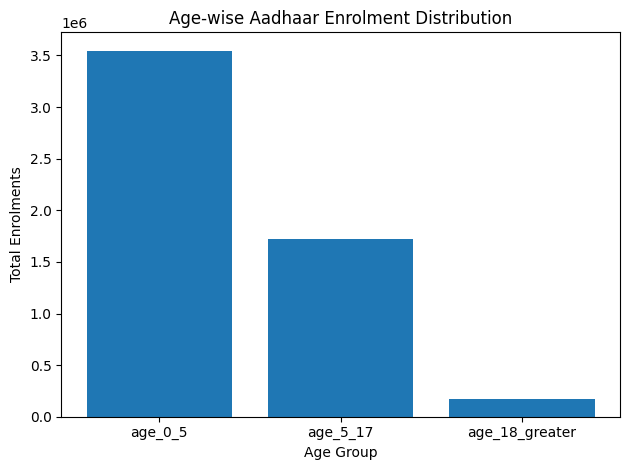

In [13]:
# Comparison Analysis (Age Group Distribution)
age_distribution = df[age_cols].sum()

plt.figure()
plt.bar(age_distribution.index, age_distribution.values)
plt.xlabel("Age Group")
plt.ylabel("Total Enrolments")
plt.title("Age-wise Aadhaar Enrolment Distribution")
plt.tight_layout()
plt.savefig("../images/enrolment_age_distribution.png", dpi=150, bbox_inches="tight")
plt.show()

In [14]:
# Anomaly Detection (Unusual State Behaviour)

# Boxplot-based anomaly detection using IQR

Q1 = state_enrolment['total_enrolments'].quantile(0.25)
Q3 = state_enrolment['total_enrolments'].quantile(0.75)
IQR = Q3 - Q1
# Identify anomalies
anomalies = state_enrolment[
    (state_enrolment['total_enrolments'] < (Q1 - 1.5 * IQR)) |
    (state_enrolment['total_enrolments'] > (Q3 + 1.5 * IQR))
]
# Display anomalous states
anomalies

,state,total_enrolments
43,Uttar Pradesh,1018629
6,Bihar,609585
26,Madhya Pradesh,493970
47,West Bengal,375308
27,Maharashtra,369139
37,Rajasthan,348458


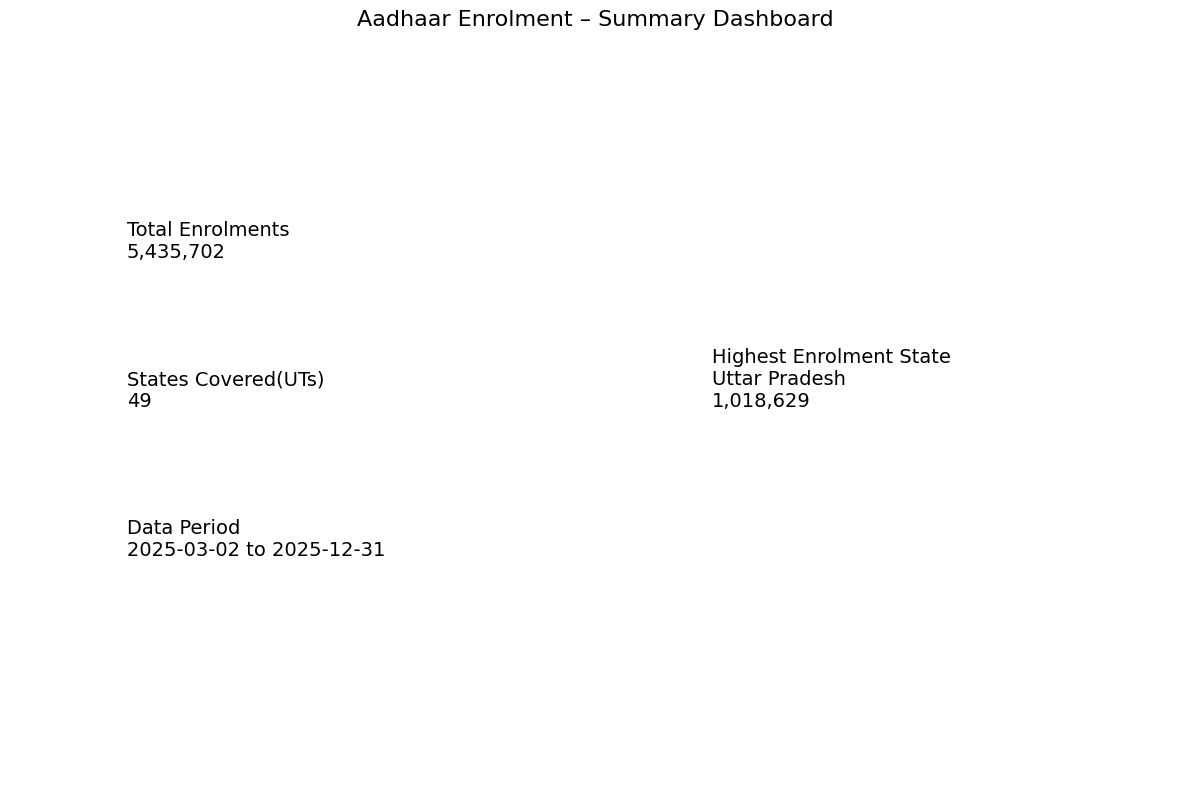

In [15]:
# Summary Metrics
total_enrolments = df['total_enrolments'].sum()
total_states = df['state'].nunique()
date_range = f"{df['date'].min().date()} to {df['date'].max().date()}"

top_state = state_enrolment.sort_values(
    'total_enrolments', ascending=False
).iloc[0]

plt.figure(figsize=(12, 8))
plt.title("Aadhaar Enrolment – Summary Dashboard", fontsize=16)

plt.text(0.1, 0.7, f"Total Enrolments\n{total_enrolments:,}", fontsize=14)
plt.text(0.1, 0.5, f"States Covered(UTs)\n{total_states}", fontsize=14)
plt.text(0.1, 0.3, f"Data Period\n{date_range}", fontsize=14)

plt.text(
    0.6, 0.5,
    f"Highest Enrolment State\n{top_state['state']}\n{top_state['total_enrolments']:,}",
    fontsize=14
)

plt.axis('off')
plt.tight_layout()
plt.savefig("../images/enrolment_dashboard.png", dpi=150, bbox_inches="tight")
plt.show()